In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
help(tfp.distributions.Binomial)

Help on class Binomial in module tensorflow_probability.python.distributions.binomial:

class Binomial(tensorflow_probability.python.distributions.distribution.DiscreteDistributionMixin, tensorflow_probability.python.distributions.distribution.AutoCompositeTensorDistribution)
 |  Binomial(total_count, logits=None, probs=None, validate_args=False, allow_nan_stats=True, name=None)
 |  
 |  Binomial distribution.
 |  
 |  This distribution is parameterized by `probs`, a (batch of) probabilities for
 |  drawing a `1`, and `total_count`, the number of trials per draw from the
 |  Binomial.
 |  
 |  #### Mathematical Details
 |  
 |  The Binomial is a distribution over the number of `1`'s in `total_count`
 |  independent trials, with each trial having the same probability of `1`, i.e.,
 |  `probs`.
 |  
 |  The probability mass function (pmf) is,
 |  
 |  ```none
 |  pmf(k; n, p) = p**k (1 - p)**(n - k) / Z
 |  Z = k! (n - k)! / n!
 |  ```
 |  
 |  where:
 |  * `total_count = n`,
 |  * `prob

In [4]:
tfd = tfp.distributions

In [5]:
binom_dist = tfd.Binomial(total_count=5, probs=0.5)

In [13]:
tf.cast(tf.constant(False, dtype = tf.bool), dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [19]:
samples = 1000000

In [20]:
tf.reduce_sum(tf.cast(binom_dist.sample(samples)==4, dtype=tf.float32))/samples

<tf.Tensor: shape=(), dtype=float32, numpy=0.15713>

Or you can get .prob from the dist directly

In [25]:
tf.reduce_sum(binom_dist.prob([4,5]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.18750001>

# World water model

In [28]:
values = np.array(['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W'])

In [29]:
values

array(['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W'], dtype='<U1')

In [30]:
help(tfd.Uniform)

Help on class Uniform in module tensorflow_probability.python.distributions.uniform:

class Uniform(tensorflow_probability.python.distributions.distribution.AutoCompositeTensorDistribution)
 |  Uniform(low=0.0, high=1.0, validate_args=False, allow_nan_stats=True, name='Uniform')
 |  
 |  Uniform distribution with `low` and `high` parameters.
 |  
 |  #### Mathematical Details
 |  
 |  The probability density function (pdf) is,
 |  
 |  ```none
 |  pdf(x; a, b) = I[a <= x < b] / Z
 |  Z = b - a
 |  ```
 |  
 |  where
 |  
 |  - `low = a`,
 |  - `high = b`,
 |  - `Z` is the normalizing constant, and
 |  - `I[predicate]` is the [indicator function](
 |    https://en.wikipedia.org/wiki/Indicator_function) for `predicate`.
 |  
 |  The parameters `low` and `high` must be shaped in a way that supports
 |  broadcasting (e.g., `high - low` is a valid operation).
 |  
 |  #### Examples
 |  
 |  ```python
 |  # Without broadcasting:
 |  u1 = Uniform(low=3.0, high=4.0)  # a single uniform distrib

In [32]:
prior = tfd.Uniform(low=1, high=1)
prior.sample(2)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>

## Given a set of 9 tosses out of which 6 appear as W and 3 as L, and a prior of 0.5 for W and 0.5 for L, what is the posterior p?

This is equal to the ways of selecting 6 W in 
9 tosses multiplied by the prob of selecting a W * multiplied by prob of selecting L

= (9C6 * 0.5^6) * (9C3 * 0.5 ^3)

= (84*0.5^9)

= 0.164025

## You can also achieve the same by sampling from the disribution

In [34]:
water_world = tfd.Binomial(9, probs=0.5)

In [36]:
water_world.prob(6)### Same as R's dbinom(6, 9, 0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.16406254>

## This can also be achieved through simulation

In [39]:
tf.reduce_sum(tf.cast(water_world.sample(samples)==6, dtype=tf.float32))/samples

<tf.Tensor: shape=(), dtype=float32, numpy=0.1639>

# Simple Grid approximation. 


The objective is to find the value of *p* - the prob of water (or the perc covering the surface). You start with a prior belief about the data (that it is going to be 1(all water)), and a set of grid points that you would like to test and compute posterior probabiliy of *p*

In [65]:
prior = tf.constant(1., dtype=tf.float64)

p_grid = tf.linspace(0, 1, 20)

In [88]:
# likelihood

likelihood = tfd.Binomial(total_count=9, probs=p_grid).prob(6)


## Posterior

unstd_posterior = prior * likelihood

std_posterior = unstd_posterior/tf.reduce_sum(unstd_posterior)


In [89]:
likelihood

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.00000000e+00, 1.51814898e-06, 8.18509295e-05, 7.77292279e-04,
       3.59857537e-03, 1.11609461e-02, 2.66829865e-02, 5.29210991e-02,
       9.08269760e-02, 1.38341326e-01, 1.89768623e-01, 2.36114658e-01,
       2.66611252e-01, 2.71400562e-01, 2.45005089e-01, 1.89768623e-01,
       1.17918118e-01, 5.02667021e-02, 8.85384487e-03, 0.00000000e+00])>

Text(0.5, 1.0, 'posterior distribution for multiple values of the parameter *p*')

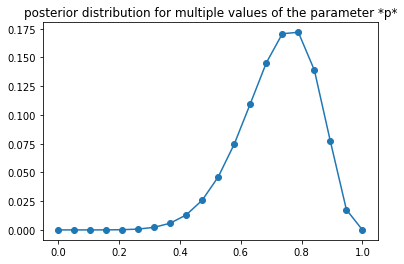

In [117]:
plt.plot(p_grid, std_posterior, '-o')
plt.title('posterior distribution for multiple values of the parameter *p*')

In [99]:
std_posterior[np.argmax(std_posterior)]

<tf.Tensor: shape=(), dtype=float64, numpy=0.1428348802869061>

In [102]:
p_grid[np.argmax(std_posterior)]

<tf.Tensor: shape=(), dtype=float64, numpy=0.6842105263157894>

# Similarly you can model the diff priors possible

In [103]:
prior = tf.exp(-5*tf.abs(p_grid - 5))

Text(0.5, 1.0, 'prior')

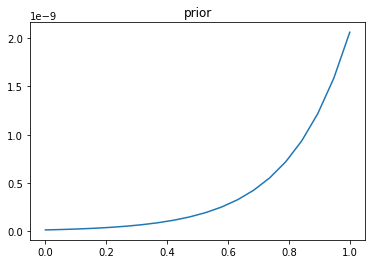

In [114]:
plt.plot(p_grid, prior)
plt.title('prior')

In [107]:
# likelihood

likelihood = tfd.Binomial(total_count=9, probs=p_grid).prob(6)


## Posterior

unstd_posterior = prior * likelihood

std_posterior = unstd_posterior/tf.reduce_sum(unstd_posterior)


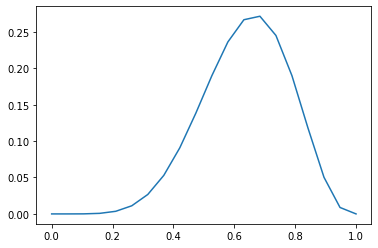

In [128]:
## Plotting the likelihood

plt.plot(p_grid, likelihood)

Text(0.5, 1.0, 'posterior distribution for multiple values of the parameter *p*')

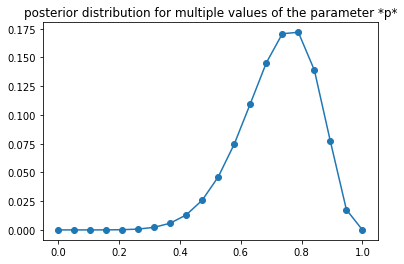

In [118]:
plt.plot(p_grid, std_posterior, '-o')
plt.title('posterior distribution for multiple values of the parameter *p*')

In [109]:
std_posterior[np.argmax(std_posterior)], p_grid[np.argmax(std_posterior)]

(<tf.Tensor: shape=(), dtype=float64, numpy=0.1719380817565298>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.7894736842105263>)

In [119]:
normal_dist = tfd.Normal(loc=0, scale=1).sample(1000)

(array([ 10.,  37., 107., 172., 241., 231., 140.,  47.,  12.,   3.]),
 array([-2.9812982 , -2.3394613 , -1.6976243 , -1.0557873 , -0.41395038,
         0.22788656,  0.8697235 ,  1.5115604 ,  2.1533973 ,  2.7952344 ,
         3.4370713 ], dtype=float32),
 <BarContainer object of 10 artists>)

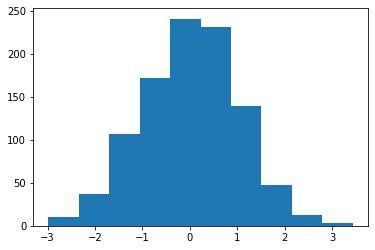

In [123]:
plt.hist(normal_dist)

(array([  1.,   3.,   6.,  16.,  15.,  35.,  76., 152., 174.,  39.]),
 array([-5.8050413 , -5.101075  , -4.397109  , -3.693143  , -2.989177  ,
        -2.2852108 , -1.5812447 , -0.87727857, -0.17331247,  0.53065366,
         1.2346197 ], dtype=float32),
 <BarContainer object of 10 artists>)

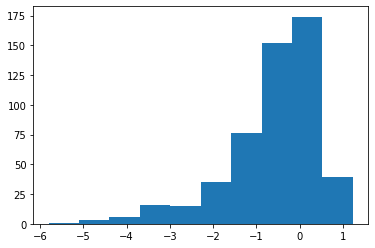

In [127]:
plt.hist(tf.math.log(normal_dist))

# Attempt at making a quadratic approximation algorithm (qap)

In [129]:
help(tf.autodiff)

Help on package tensorflow._api.v2.autodiff in tensorflow._api.v2:

NAME
    tensorflow._api.v2.autodiff - Public API for tf.autodiff namespace.

PACKAGE CONTENTS


FILE
    c:\anaconda3\envs\bmcp\lib\site-packages\tensorflow\_api\v2\autodiff\__init__.py




In [131]:
x = tf.Variable([1.,2.,3.], dtype=tf.float64)

In [217]:
def compute_posterior(prior, p_grid, plot = False):
    ##Likelihood
    likelihood = tfd.Binomial(9, probs=p_grid).prob(6)

    unstd_posterior = prior * likelihood

    std_posterior = unstd_posterior/tf.reduce_sum(unstd_posterior)

    if plot:
        plt.plot(p_grid, std_posterior, '-o')
        plt.title('posterior plot')

    return std_posterior


In [150]:
p_grid

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])>

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.00000000e+00, 3.45485450e-08, 2.42341062e-06, 2.99416526e-05,
       1.80347463e-04, 7.27726963e-04, 2.26354907e-03, 5.84080026e-03,
       1.30420655e-02, 2.58446989e-02, 4.61245317e-02, 7.46652519e-02,
       1.09688748e-01, 1.45272152e-01, 1.70621892e-01, 1.71938082e-01,
       1.39000458e-01, 7.70910760e-02, 1.76662204e-02, 0.00000000e+00])>

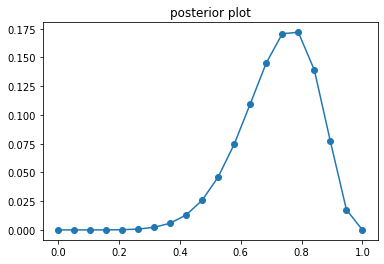

In [221]:
compute_posterior(prior=prior, p_grid=p_grid, plot=True)

In [265]:
def compute_maxima(prior, p_grid):
    with tf.GradientTape() as tape:
        tape.watch(p_grid)
        y = -tf.math.log(compute_posterior(prior, p_grid))

    gradients = tape.gradient(y, p_grid)

    plt.plot()
    plt.plot(p_grid, gradients, '-ro')
    plt.title('Gradients')

    return p_grid[tf.argmin(gradients)], gradients



In [223]:
p_grid2 = tf.linspace(0, 1, 20)
prior_2= tf.exp(-5*tf.abs(p_grid2 - 5))


Text(0.5, 1.0, 'prior_d')

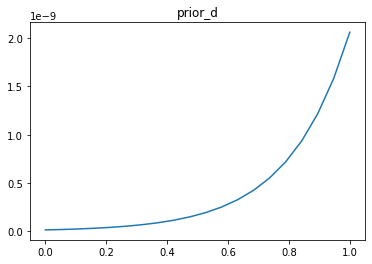

In [224]:
plt.plot(p_grid2, prior_2)
plt.title('prior_d')


<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.00000000e+00, 3.45485450e-08, 2.42341062e-06, 2.99416526e-05,
       1.80347463e-04, 7.27726963e-04, 2.26354907e-03, 5.84080026e-03,
       1.30420655e-02, 2.58446989e-02, 4.61245317e-02, 7.46652519e-02,
       1.09688748e-01, 1.45272152e-01, 1.70621892e-01, 1.71938082e-01,
       1.39000458e-01, 7.70910760e-02, 1.76662204e-02, 0.00000000e+00])>

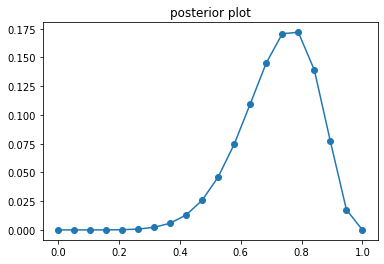

In [266]:
compute_posterior(prior=prior_2, p_grid=p_grid2, plot=True)

(<tf.Tensor: shape=(), dtype=float64, numpy=0.05263157894736842>,
 <tf.Tensor: shape=(18,), dtype=float64, numpy=
 array([-110.83326441,  -53.64471866,  -34.41893992,  -24.61981752,
         -18.48324427,  -14.01989709,  -10.32291383,   -6.93936104,
          -3.72574143,   -0.86010938,    1.11400843,    1.32239657,
          -1.18011831,   -6.74617495,  -13.93098839,  -17.83634785,
          -8.44825798,   34.55507367])>)

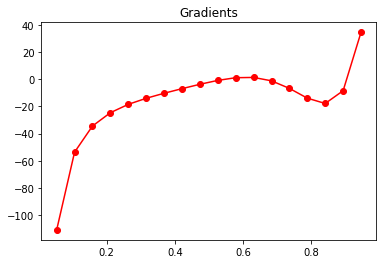

In [269]:
compute_maxima(prior=prior_2[1:19], p_grid=p_grid2[1:19])

In [203]:
plt.plot(compute_posterior(prior=prior_2, p_grid=p_grid2)

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.00000000e+00, 3.45485450e-08, 2.42341062e-06, 2.99416526e-05,
       1.80347463e-04, 7.27726963e-04, 2.26354907e-03, 5.84080026e-03,
       1.30420655e-02, 2.58446989e-02, 4.61245317e-02, 7.46652519e-02,
       1.09688748e-01, 1.45272152e-01, 1.70621892e-01, 1.71938082e-01,
       1.39000458e-01, 7.70910760e-02, 1.76662204e-02, 0.00000000e+00])>

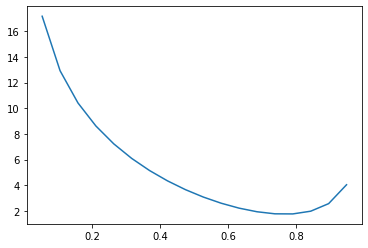

In [240]:
plt.plot(p_grid2, -tf.math.log(compute_posterior(prior=prior_2, p_grid=p_grid2)))

In [248]:
-tf.math.log(compute_posterior(prior=prior_2, p_grid=p_grid2))

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([        inf, 17.1809004 , 12.93033466, 10.41625998,  8.62062522,
        7.22558463,  6.09082131,  5.14288746,  4.33957534,  3.65564977,
        3.07641033,  2.59474046,  2.21010849,  1.92914638,  1.76830533,
        1.76062086,  1.97327805,  2.56276775,  4.03610092,         inf])>

In [251]:
p_grid2

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])>

In [255]:
-tf.math.log(compute_posterior(prior=prior_2, p_grid=p_grid2))

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([        inf, 17.1809004 , 12.93033466, 10.41625998,  8.62062522,
        7.22558463,  6.09082131,  5.14288746,  4.33957534,  3.65564977,
        3.07641033,  2.59474046,  2.21010849,  1.92914638,  1.76830533,
        1.76062086,  1.97327805,  2.56276775,  4.03610092,         inf])>

In [250]:
p_grid2[15]

<tf.Tensor: shape=(), dtype=float64, numpy=0.7894736842105263>

In [252]:
help(tf.GradientTape().gradient)

Help on method gradient in module tensorflow.python.eager.backprop:

gradient(target, sources, output_gradients=None, unconnected_gradients=<UnconnectedGradients.NONE: 'none'>) method of tensorflow.python.eager.backprop.GradientTape instance
    Computes the gradient using operations recorded in context of this tape.
    
    Note: Unless you set `persistent=True` a GradientTape can only be used to
    compute one set of gradients (or jacobians).
    
    In addition to Tensors, gradient also supports RaggedTensors. For example,
    
    >>> x = tf.ragged.constant([[1.0, 2.0], [3.0]])
    >>> with tf.GradientTape() as g:
    ...   g.watch(x)
    ...   y = x * x
    >>> g.gradient(y, x)
    <tf.RaggedTensor [[2.0, 4.0], [6.0]]>
    
    Args:
      target: a list or nested structure of Tensors or Variables or
        CompositeTensors to be differentiated.
      sources: a list or nested structure of Tensors or Variables or
        CompositeTensors. `target` will be differentiated agains

In [257]:
p_grid[1:20]

<tf.Tensor: shape=(19,), dtype=float64, numpy=
array([0.05263158, 0.10526316, 0.15789474, 0.21052632, 0.26315789,
       0.31578947, 0.36842105, 0.42105263, 0.47368421, 0.52631579,
       0.57894737, 0.63157895, 0.68421053, 0.73684211, 0.78947368,
       0.84210526, 0.89473684, 0.94736842, 1.        ])>

In [264]:
with tf.GradientTape() as tape:
    tape.watch(p_grid2)
    y=-tf.math.log(compute_posterior(prior=prior_2, p_grid=p_grid2))

tape.gradient(y, p_grid2)

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])>

In [263]:
value

In [242]:
p_grid2[tf.argmin(-tf.math.log(compute_posterior(prior=prior_2, p_grid=p_grid2)))]

<tf.Tensor: shape=(), dtype=float64, numpy=0.7894736842105263>

In [234]:
help(tfp.optimizer.bfgs_minimize)

Help on function minimize in module tensorflow_probability.python.optimizer.bfgs:

minimize(value_and_gradients_function, initial_position, tolerance=1e-08, x_tolerance=0, f_relative_tolerance=0, initial_inverse_hessian_estimate=None, max_iterations=50, parallel_iterations=1, stopping_condition=None, validate_args=True, max_line_search_iterations=50, f_absolute_tolerance=0, name=None)
    Applies the BFGS algorithm to minimize a differentiable function.
    
    Performs unconstrained minimization of a differentiable function using the
    BFGS scheme. For details of the algorithm, see [Nocedal and Wright(2006)][1].
    
    ### Usage:
    
    The following example demonstrates the BFGS optimizer attempting to find the
    minimum for a simple two dimensional quadratic objective function.
    
    ```python
      minimum = np.array([1.0, 1.0])  # The center of the quadratic bowl.
      scales = np.array([2.0, 3.0])  # The scales along the two axes.
    
      # The objective function 

In [201]:
val, data = compute_maxima(prior=prior_2, p_grid=p_grid2)

In [202]:
val

<tf.Tensor: shape=(), dtype=float64, numpy=0.5789473684210527>

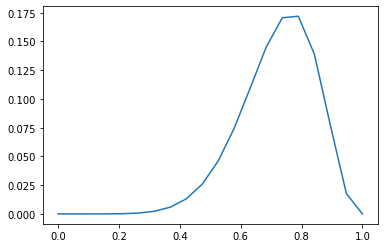

In [192]:
plt.plot(p_grid, std_posterior)

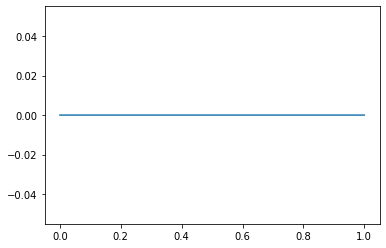

In [198]:
plt.plot(p_grid2, data)

In [185]:
p_grid[tf.argmax(std_posterior)]

<tf.Tensor: shape=(), dtype=float64, numpy=0.7894736842105263>

In [177]:
prior_base = tf.constant(1., dtype=tf.float64)

In [178]:
val_b, data_b =compute_maxima(prior=prior_base, p_grid=p_grid)

In [179]:
val_b

<tf.Tensor: shape=(), dtype=float64, numpy=0.05263157894736842>

In [180]:
data_b

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., nan])>